<a href="https://colab.research.google.com/github/josephine0311/Josephine-Waita/blob/main/Andat_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part A : Initial Inspection

In [35]:
import pandas as pd

In [36]:
# Baca file CSV
df = pd.read_csv('/content/health_insurance_claims.csv')

# Tampilkan 10 baris pertama
print(df.head(10))

   claim_id   age  gender policy_type diagnosis_code  claim_amount  \
0         1  69.0    Male    Standard           D001       9536.85   
1         2  32.0    Male       Basic           D004      13215.40   
2         3  89.0  Female     Premium           D004       2053.08   
3         4  78.0    Male       Basic           D001       6538.17   
4         5  38.0  Female       Basic           D003       4424.58   
5         6  41.0    Male    Standard           D005       6214.82   
6         7  20.0    Male    Standard            NaN       4845.43   
7         8  39.0    Male    Standard           D003       5391.60   
8         9  70.0  Female    Standard           D005      10029.57   
9        10  19.0    Male       Basic           D004       2950.42   

  payment_status  
0        Pending  
1        Pending  
2        Pending  
3           Paid  
4           Paid  
5           Paid  
6           Paid  
7           Paid  
8           Paid  
9           Paid  


In [37]:
# Tampilkan jumlah baris dan kolom
print(f'Jumlah baris: {df.shape[0]}')
print(f'Jumlah kolom: {df.shape[1]}')

Jumlah baris: 10000
Jumlah kolom: 7


In [38]:
# Hasil ringkasan statistik untuk semua variabel numerik
print(df.describe())

          claim_id          age  claim_amount
count  10000.00000  9800.000000   9800.000000
mean    5000.50000    53.582959   4008.560987
std     2886.89568    20.749805   2843.926721
min        1.00000    18.000000     50.220000
25%     2500.75000    36.000000   1890.927500
50%     5000.50000    53.000000   3352.395000
75%     7500.25000    72.000000   5407.177500
max    10000.00000    89.000000  21581.180000


In [39]:
# Identifikasi variabel kategorikal dan numerik
categorical_vars = df.select_dtypes(include=['object']).columns
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns

In [40]:
print(f'Variabel kategorikal: {categorical_vars}')
print(f'Variabel numerik: {numerical_vars}')

Variabel kategorikal: Index(['gender', 'policy_type', 'diagnosis_code', 'payment_status'], dtype='object')
Variabel numerik: Index(['claim_id', 'age', 'claim_amount'], dtype='object')


# Part B : Missing Value

In [41]:
#Tampilkan jumlah nilai yang hilang per variabel
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang per variabel :")
print(missing_values)

Jumlah nilai yang hilang per variabel :
claim_id            0
age               200
gender              0
policy_type         0
diagnosis_code    200
claim_amount      200
payment_status      0
dtype: int64


In [42]:
# Simpan jumlah nilai yang hilang sebelum pengisian
missing_before = missing_values.copy()

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

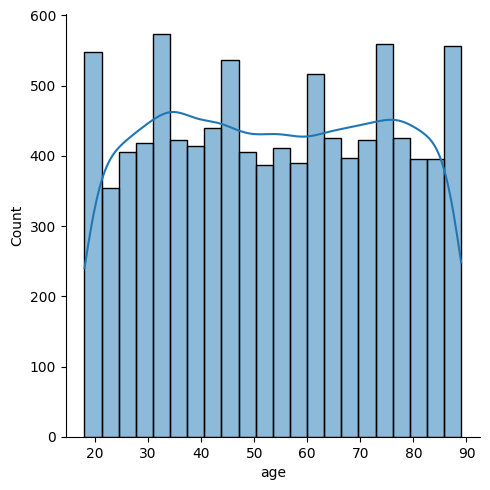

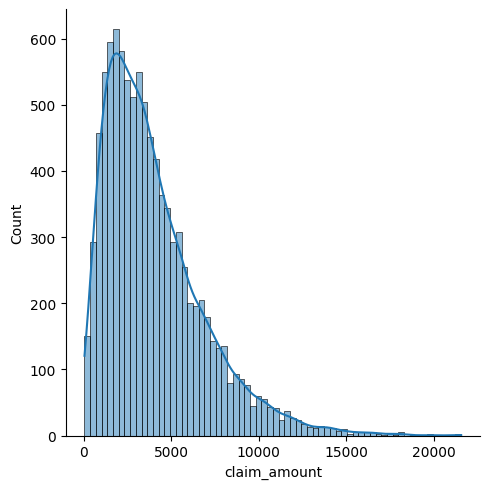

In [44]:
# Identifikasi grafik
sns.displot(df['age'], kde = True)
sns.displot(df['claim_amount'], kde = True)

In [45]:
# Isi nilai yang hilang
df['age'] = df['age'].fillna(df['age'].mean()) # mean karena pesebaran rata
df['claim_amount'] = df['claim_amount'].fillna(df['claim_amount'].median()) # median karena dia mepet ke Y
df['diagnosis_code'] = df['diagnosis_code'].fillna(df['diagnosis_code'].mode()[0]) # modus karena data kategorikal

In [46]:
# Tampilkan jumlah nilai yang hilang setelah pengisian
missing_after = df.isnull().sum()
print("Jumlah nilai yang hilang setelah pengisian:")
print(missing_after)

Jumlah nilai yang hilang setelah pengisian:
claim_id          0
age               0
gender            0
policy_type       0
diagnosis_code    0
claim_amount      0
payment_status    0
dtype: int64


In [47]:
# Tampilkan perbandingan sebelum dan sesudah
comparison = pd.DataFrame({
    'Before': missing_before,
    'After': missing_after
})
print("\nPerbandingan sebelum dan sesudah pengisian nilai yang hilang:")
print(comparison)



Perbandingan sebelum dan sesudah pengisian nilai yang hilang:
                Before  After
claim_id             0      0
age                200      0
gender               0      0
policy_type          0      0
diagnosis_code     200      0
claim_amount       200      0
payment_status       0      0


# Part C: Duplicates & Data Integrity

In [48]:
# Cek duplikasi kolom 'claim_id'
duplicate_claims = df[df.duplicated(subset='claim_id', keep=False)]
print(duplicate_claims)

Empty DataFrame
Columns: [claim_id, age, gender, policy_type, diagnosis_code, claim_amount, payment_status]
Index: []


Tidak ada duplikasi, sebenarnya bisa langsung di skip langkah-langkah menghapus duplikasi. Tapi biar lengkap, dituliskan saja langkah-langkah menghapus duplikasi pada data.

In [49]:
# Hapus duplikasi
rows_before = df.shape[0]
df.drop_duplicates(subset='claim_id', keep='first')
rows_after = df.shape[0]

In [50]:
# Tampilkan berapa banyak baris yang dihapus
rows_removed = rows_before - rows_after
print(f"Jumlah baris yang dihapus: {rows_removed}")

Jumlah baris yang dihapus: 0


In [51]:
# Verifikasi bahwa semua claim_id yang tersisa adalah unik
unique_claims = df['claim_id'].is_unique
print(f"Apakah semua claim_id yang tersisa unik? {unique_claims}")

Apakah semua claim_id yang tersisa unik? True


# Part D: Outlier Detection

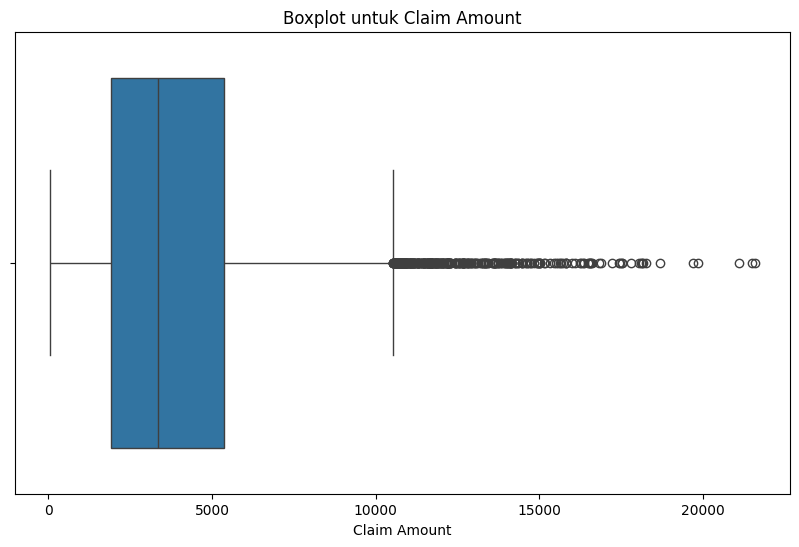

In [52]:
# Buat boxplot untuk 'claim_amount'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['claim_amount'])
plt.title('Boxplot untuk Claim Amount')
plt.xlabel('Claim Amount')
plt.show()

In [53]:
# Hitung IQR untuk 'claim_amount'
Q1 = df['claim_amount'].quantile(0.25)
Q3 = df['claim_amount'].quantile(0.75)
IQR = Q3 - Q1

In [54]:
# Tentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [55]:
# Identifikasi outlier
outliers = df[(df['claim_amount'] < lower_bound) | (df['claim_amount'] > upper_bound)]
print(f'Jumlah outlier yang terdeteksi: {outliers.shape[0]}')

Jumlah outlier yang terdeteksi: 329


In [56]:
# Hapus Outlier
data_no_outliers = df[~((df['claim_amount'] < lower_bound) | (df['claim_amount'] > upper_bound))]

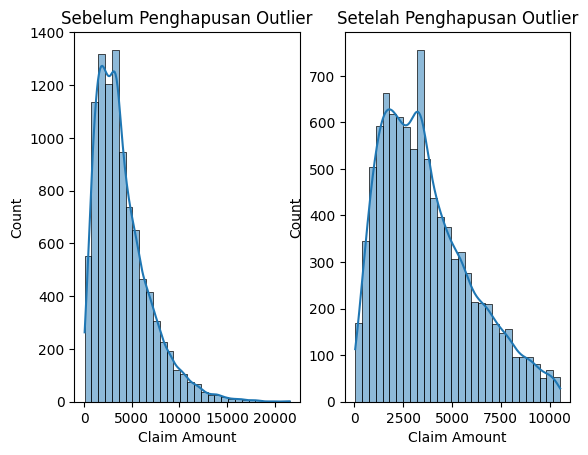

<Figure size 1500x600 with 0 Axes>

In [57]:
#Tampilkan plot distribusi sebelum dan sesudah treatment terhadap outlier
# Plot distribusi sebelum penghapusan outlier
plt.subplot(1, 2, 1)
sns.histplot(df['claim_amount'], bins=30, kde=True)
plt.title('Sebelum Penghapusan Outlier')
plt.xlabel('Claim Amount')

# Plot distribusi setelah penghapusan outlier
plt.subplot(1, 2, 2)
sns.histplot(data_no_outliers['claim_amount'], bins=30, kde=True)
plt.title('Setelah Penghapusan Outlier')
plt.xlabel('Claim Amount')

plt.figure(figsize=(15, 6))
plt.tight_layout()
plt.show()

# Part E: Data Transformation

In [58]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [59]:
# Encode variabel kategorikal menggunakan label encoding
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['policy_type'] = label_encoder.fit_transform(df['policy_type'])
df['payment_status'] = label_encoder.fit_transform(df['payment_status'])

In [60]:
# Normalisasi variabel claim_amount
scaler = StandardScaler()
df['claim_amount'] = scaler.fit_transform(df[['claim_amount']].values.reshape(-1,1))

In [61]:
# Tampilkan dataset setelah transformasi
print(df.head())

   claim_id   age  gender  policy_type diagnosis_code  claim_amount  \
0         1  69.0       1            2           D001      1.967343   
1         2  32.0       1            0           D004      3.273322   
2         3  89.0       0            1           D004     -0.689587   
3         4  78.0       1            0           D001      0.902735   
4         5  38.0       0            0           D003      0.152356   

   payment_status  
0               2  
1               2  
2               2  
3               1  
4               1  


### Mengapa Normalisasi Penting untuk Modeling Selanjutnya:
- **Mencegah Dominasi Fitur**:
Machine Learning Model seringkali bekerja lebih baik ketika fitur memiliki skala yang serupa. Jika tidak, fitur dengan nilai yang lebih besar dapat mendominasi fitur dengan nilai yang lebih kecil.

- **Konvergensi yang Lebih Cepat**:
Algoritma yang menggunakan optimasi (seperti Gradient Descent) dapat berkonvergensi lebih cepat karena ruang pencarian menjadi lebih simetris.

- **Hasil yang Lebih Stabil**:
Normalisasi dapat membantu meningkatkan stabilitas dan akurasi model, terutama pada algoritma yang merespon data dengan penggunaan jarak, seperti KNN atau SVM.

Dengan menggunakan teknik-teknik ini, kita dapat mempersiapkan data kita dengan lebih baik untuk machine learning model di langkah selanjutnya.

# Part F: Reporting & Documentation

In [62]:
# Simpan dataset bersih ke file baru
df.to_csv("health_insurance_claims_clean.csv", index=False)
print("Dataset bersih berhasil disimpan sebagai health_insurance_claims_clean.csv")

Dataset bersih berhasil disimpan sebagai health_insurance_claims_clean.csv
